Train samples: 96 Test samples: 48


C:\Users\ajays\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
43/43 - 2s - 39ms/step - loss: 90496.6172
Epoch 2/200
43/43 - 0s - 6ms/step - loss: 53362.2695
Epoch 3/200
43/43 - 0s - 6ms/step - loss: 37573.0234
Epoch 4/200
43/43 - 0s - 6ms/step - loss: 18439.3320
Epoch 5/200
43/43 - 0s - 6ms/step - loss: 3765.2327
Epoch 6/200
43/43 - 0s - 6ms/step - loss: 1066.4940
Epoch 7/200
43/43 - 0s - 6ms/step - loss: 1029.8540
Epoch 8/200
43/43 - 0s - 6ms/step - loss: 1017.9370
Epoch 9/200
43/43 - 0s - 6ms/step - loss: 1016.9582
Epoch 10/200
43/43 - 0s - 5ms/step - loss: 1012.1089
Epoch 11/200
43/43 - 0s - 5ms/step - loss: 998.9084
Epoch 12/200
43/43 - 0s - 9ms/step - loss: 1000.9739
Epoch 13/200
43/43 - 0s - 7ms/step - loss: 996.6902
Epoch 14/200
43/43 - 0s - 6ms/step - loss: 1021.1192
Epoch 15/200
43/43 - 0s - 7ms/step - loss: 1008.3347
Epoch 16/200
43/43 - 0s - 6ms/step - loss: 987.2106
Epoch 17/200
43/43 - 0s - 6ms/step - loss: 998.3732
Epoch 18/200
43/43 - 0s - 7ms/step - loss: 1006.4613
Epoch 19/200
43/43 - 0s - 6ms/step - loss: 967.2266
Ep

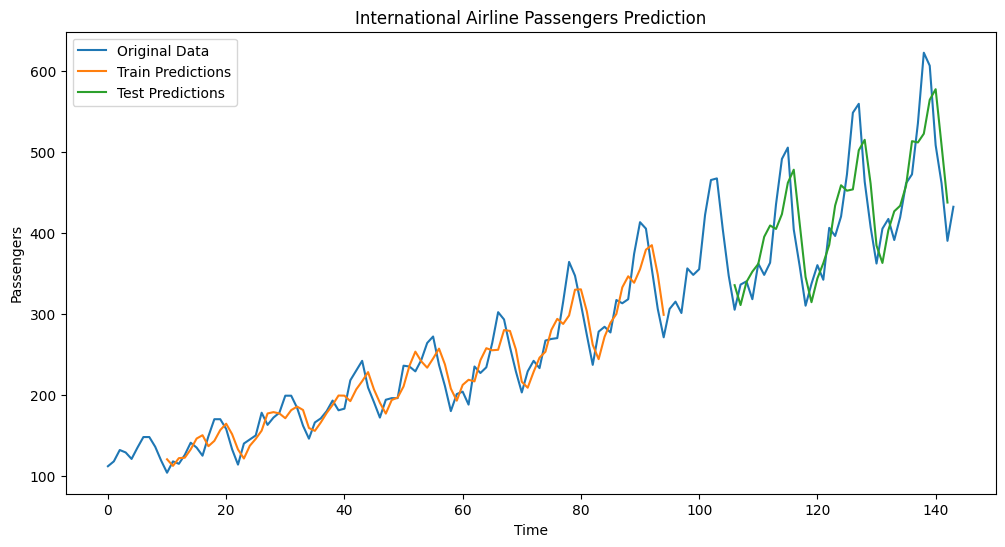

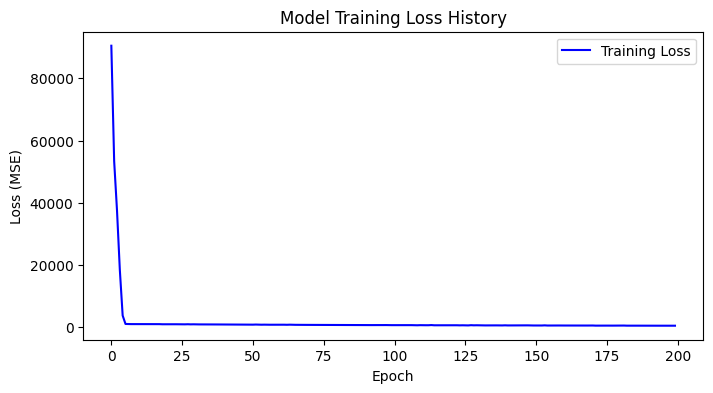

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ----------------------------
# Function to create dataset matrix
# ----------------------------
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Fix random seed for reproducibility
np.random.seed(7)

# ----------------------------
# Load the dataset from the internet
# ----------------------------
# This URL hosts the Airline Passengers dataset (Month,Passengers)
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
# We use only the second column (index 1) which contains the number of passengers.
dataframe = pd.read_csv(data_url, usecols=[1])
dataset = dataframe.values.astype(np.float32)

# ----------------------------
# Split into train and test sets
# ----------------------------
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Train samples:", len(train), "Test samples:", len(test))

# ----------------------------
# Reshape dataset using look-back window
# ----------------------------
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# ----------------------------
# Create and fit Multilayer Perceptron model
# ----------------------------
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())

# Capture the training history for plotting
history = model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

# ----------------------------
# Evaluate model performance
# ----------------------------
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print("Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))

# ----------------------------
# Generate predictions for train and test sets
# ----------------------------
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# ----------------------------
# Prepare data for plotting predictions
# ----------------------------
# Create empty arrays to hold predictions, same shape as the original dataset
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
# Shift test predictions to align with the original dataset timeline
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

# ----------------------------
# Plot the original dataset and predictions
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(dataset, label='Original Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.title("International Airline Passengers Prediction")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# ----------------------------
# Plot the training history (loss)
# ----------------------------
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.title("Model Training Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


Train samples: 96 Test samples: 48
Epoch 1/100


C:\Users\ajays\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 3s - 32ms/step - loss: 0.0558
Epoch 2/100
94/94 - 0s - 5ms/step - loss: 0.0281
Epoch 3/100
94/94 - 0s - 5ms/step - loss: 0.0199
Epoch 4/100
94/94 - 0s - 5ms/step - loss: 0.0181
Epoch 5/100
94/94 - 0s - 4ms/step - loss: 0.0171
Epoch 6/100
94/94 - 0s - 4ms/step - loss: 0.0160
Epoch 7/100
94/94 - 0s - 4ms/step - loss: 0.0150
Epoch 8/100
94/94 - 0s - 5ms/step - loss: 0.0141
Epoch 9/100
94/94 - 0s - 4ms/step - loss: 0.0131
Epoch 10/100
94/94 - 0s - 4ms/step - loss: 0.0119
Epoch 11/100
94/94 - 0s - 4ms/step - loss: 0.0107
Epoch 12/100
94/94 - 0s - 4ms/step - loss: 0.0094
Epoch 13/100
94/94 - 0s - 4ms/step - loss: 0.0081
Epoch 14/100
94/94 - 0s - 4ms/step - loss: 0.0067
Epoch 15/100
94/94 - 0s - 4ms/step - loss: 0.0054
Epoch 16/100
94/94 - 0s - 4ms/step - loss: 0.0044
Epoch 17/100
94/94 - 0s - 4ms/step - loss: 0.0035
Epoch 18/100
94/94 - 0s - 4ms/step - loss: 0.0029
Epoch 19/100
94/94 - 0s - 4ms/step - loss: 0.0025
Epoch 20/100
94/94 - 0s - 4ms/step - loss: 0.0023
Epoch 21/100
94/94 -

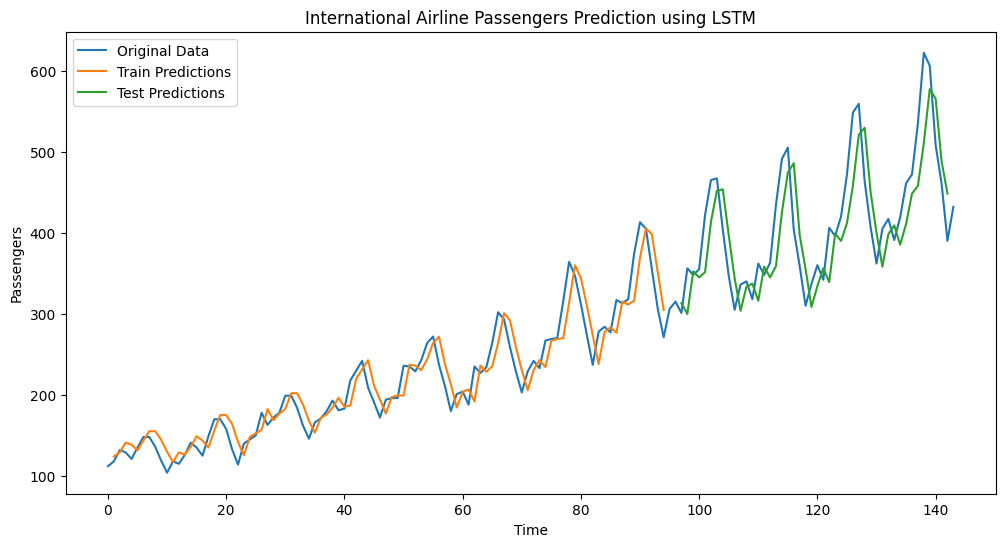

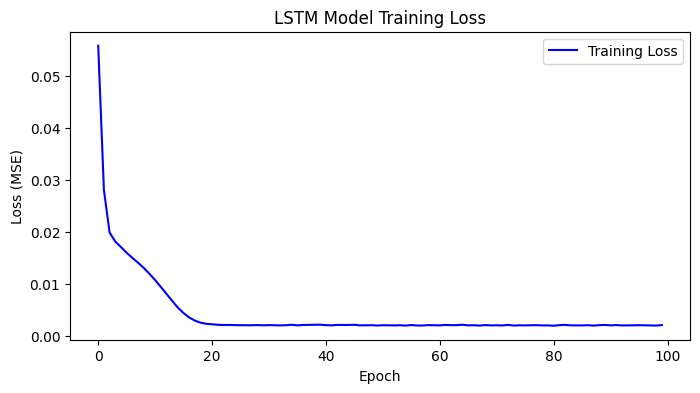

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# ----------------------------
# Function to create dataset matrix
# ----------------------------
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Fix random seed for reproducibility
np.random.seed(7)

# ----------------------------
# Load the dataset from an online repository
# ----------------------------
# This URL hosts the Airline Passengers dataset on GitHub.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values.astype(np.float32)

# ----------------------------
# Normalize the dataset
# ----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# ----------------------------
# Split into train and test sets
# ----------------------------
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Train samples:", len(train), "Test samples:", len(test))

# ----------------------------
# Reshape dataset using look-back window
# ----------------------------
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features] for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# ----------------------------
# Create and fit the LSTM network
# ----------------------------
model = Sequential()
# LSTM layer with 4 units; input_shape is (time steps, features)
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())

# Train the model
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# ----------------------------
# Make predictions
# ----------------------------
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# ----------------------------
# Invert predictions to original scale
# ----------------------------
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform(testY.reshape(-1, 1))

# ----------------------------
# Calculate root mean squared error
# ----------------------------
trainScore = math.sqrt(mean_squared_error(trainY_inv[:,0], trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_inv[:,0], testPredict[:,0]))
print("Test Score: %.2f RMSE" % (testScore))

# ----------------------------
# Shift train predictions for plotting
# ----------------------------
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

# ----------------------------
# Plot baseline and predictions
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.title("International Airline Passengers Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# ----------------------------
# Plot training history (loss)
# ----------------------------
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.title("LSTM Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


Train samples: 96 Test samples: 48


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (1, 1, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (1, 4)                      │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 1)                      │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

94/94 - 3s - 29ms/step - loss: 0.0052
94/94 - 0s - 4ms/step - loss: 0.0139
94/94 - 0s - 4ms/step - loss: 0.0083
94/94 - 0s - 4ms/step - loss: 0.0058
94/94 - 0s - 4ms/step - loss: 0.0046
94/94 - 0s - 4ms/step - loss: 0.0040
94/94 - 0s - 4ms/step - loss: 0.0037
94/94 - 0s - 4ms/step - loss: 0.0036
94/94 - 0s - 4ms/step - loss: 0.0036
94/94 - 0s - 4ms/step - loss: 0.0036
94/94 - 0s - 4ms/step - loss: 0.0036
94/94 - 0s - 4ms/step - loss: 0.0036
94/94 - 0s - 4ms/step - loss: 0.0036
94/94 - 0s - 4ms/step - loss: 0.0036
94/94 - 0s - 4ms/step - loss: 0.0035
94/94 - 0s - 4ms/step - loss: 0.0035
94/94 - 0s - 4ms/step - loss: 0.0035
94/94 - 0s - 4ms/step - loss: 0.0035
94/94 - 0s - 4ms/step - loss: 0.0035
94/94 - 0s - 4ms/step - loss: 0.0035
94/94 - 0s - 4ms/step - loss: 0.0034
94/94 - 0s - 4ms/step - loss: 0.0034
94/94 - 0s - 4ms/step - loss: 0.0034
94/94 - 0s - 4ms/step - loss: 0.0034
94/94 - 0s - 4ms/step - loss: 0.0034
94/94 - 0s - 4ms/step - loss: 0.0034
94/94 - 0s - 4ms/step - loss: 0.0034


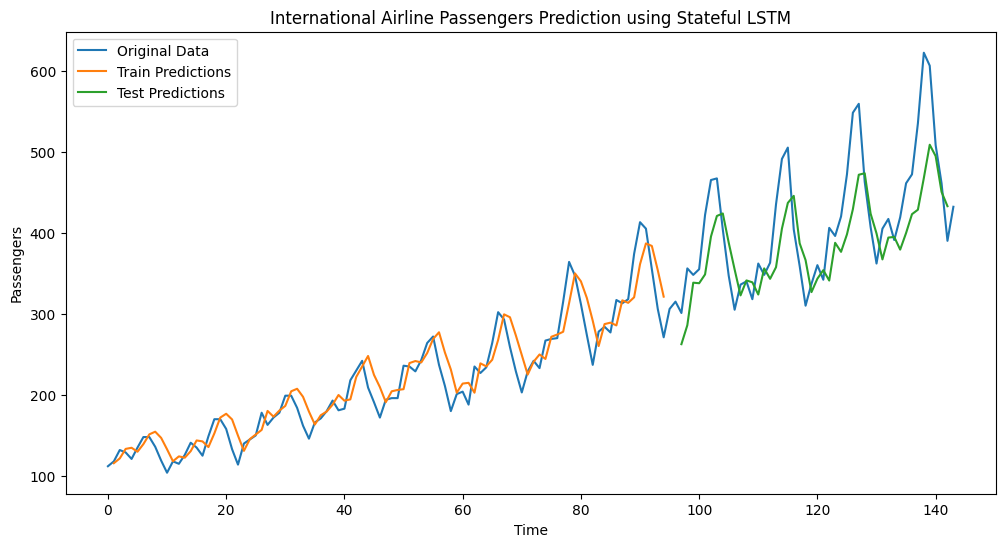

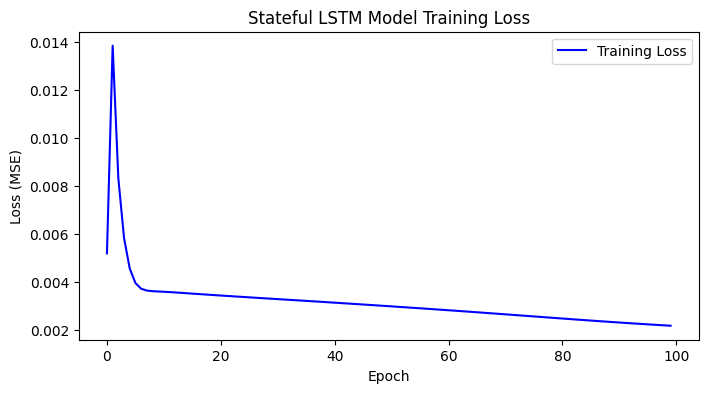

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# ----------------------------
# Function to create dataset matrix
# ----------------------------
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Fix random seed for reproducibility
np.random.seed(7)

# ----------------------------
# Load the dataset from an online repository
# ----------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values.astype(np.float32)

# ----------------------------
# Normalize the dataset
# ----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# ----------------------------
# Split into train and test sets
# ----------------------------
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Train samples:", len(train), "Test samples:", len(test))

# ----------------------------
# Reshape dataset using look-back window
# ----------------------------
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# For stateful LSTM, the batch size must be fixed.
batch_size = 1

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX,  (testX.shape[0],  1, testX.shape[1]))

# ----------------------------
# Create the stateful LSTM network using the Functional API
# ----------------------------
# Specify a fixed batch size in the Input layer using 'batch_shape'
inputs = Input(batch_shape=(batch_size, 1, look_back))
lstm_out = LSTM(4, stateful=True)(inputs)
outputs = Dense(1)(lstm_out)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='mean_squared_error', optimizer=Adam())
model.summary()

# ----------------------------
# Train the model one epoch at a time (stateful training)
# ----------------------------
epochs = 100
train_loss_history = []
for epoch in range(epochs):
    history = model.fit(trainX, trainY, epochs=1, batch_size=batch_size,
                        shuffle=False, verbose=2)
    train_loss_history.append(history.history['loss'][0])
    # Reset states on each stateful layer
    for layer in model.layers:
        if hasattr(layer, 'reset_states'):
            layer.reset_states()

# ----------------------------
# Make predictions
# ----------------------------
for layer in model.layers:
    if hasattr(layer, 'reset_states'):
        layer.reset_states()
trainPredict = model.predict(trainX, batch_size=batch_size)
for layer in model.layers:
    if hasattr(layer, 'reset_states'):
        layer.reset_states()
testPredict  = model.predict(testX,  batch_size=batch_size)

# ----------------------------
# Invert predictions to original scale
# ----------------------------
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv   = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict  = scaler.inverse_transform(testPredict)
testY_inv    = scaler.inverse_transform(testY.reshape(-1, 1))

# ----------------------------
# Calculate root mean squared error
# ----------------------------
trainScore = math.sqrt(mean_squared_error(trainY_inv[:, 0], trainPredict[:, 0]))
print("Train Score: %.2f RMSE" % trainScore)
testScore  = math.sqrt(mean_squared_error(testY_inv[:, 0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % testScore)

# ----------------------------
# Shift predictions for plotting
# ----------------------------
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

# ----------------------------
# Plot original data and predictions
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.title("International Airline Passengers Prediction using Stateful LSTM")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# ----------------------------
# Plot training history (loss)
# ----------------------------
plt.figure(figsize=(8, 4))
plt.plot(train_loss_history, 'b-', label='Training Loss')
plt.title("Stateful LSTM Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()
